<a href="https://colab.research.google.com/github/ops865ops865/Tibame-GAD258-0-/blob/main/SVM_red_%E8%A8%93%E7%B7%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 載入訓練用資料

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('./Original/train_red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,row_id
0,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2,5,583
1,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,5,627
2,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7,1031
3,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4,5,621
4,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6,491


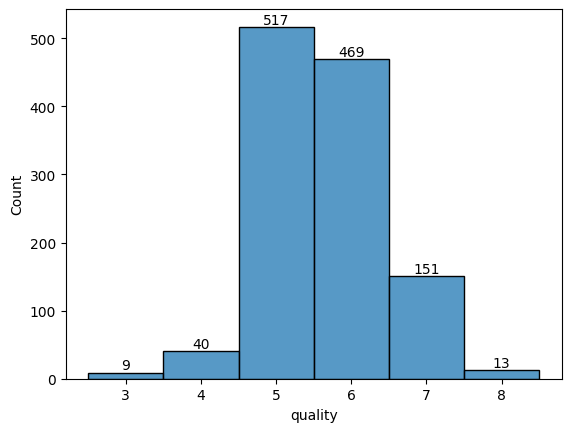

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.histplot(data['quality'], discrete=True)
# 幫每個柱子加數量標籤
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            int(height),
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom'
        )
plt.show()


In [ ]:
#列出欄位名稱
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'row_id'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1199 non-null   float64
 1   volatile acidity      1199 non-null   float64
 2   citric acid           1199 non-null   float64
 3   residual sugar        1199 non-null   float64
 4   chlorides             1199 non-null   float64
 5   free sulfur dioxide   1199 non-null   float64
 6   total sulfur dioxide  1199 non-null   float64
 7   density               1199 non-null   float64
 8   pH                    1199 non-null   float64
 9   sulphates             1199 non-null   float64
 10  alcohol               1199 non-null   float64
 11  quality               1199 non-null   int64  
 12  row_id                1199 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 121.9 KB


In [ ]:
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y = data['quality']

In [ ]:
Ｘ


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2
1,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
2,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5
3,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4
4,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1194,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1195,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
1196,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1197,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


### StandardScaler

In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

In [ ]:
X_train_scaled
X_ = pd.DataFrame(X_train_scaled, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
# X_ = pd.DataFrame(X_train_scaled, columns=['fixed acidity', 'volatile acidity', 'residual sugar',
#        'chlorides', 'density',
#        'pH', 'sulphates', 'alcohol'])
X_

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.974181,-0.232603,1.114588,-0.246318,-0.110746,-1.060007,-0.962240,1.756955,-0.786419,-1.313194,-1.152577
1,0.281894,0.378026,0.090887,-0.246318,0.193294,-1.060007,-0.962240,1.105315,0.316104,-0.970646,-1.247037
2,-0.710137,0.322515,-1.393481,-0.317176,0.051409,-0.669757,-0.992531,-1.023376,0.705229,-0.628099,1.019988
3,-0.009880,0.044956,-0.165039,0.603976,-0.252631,0.013182,1.976031,0.453675,-0.267585,-0.285551,-0.963659
4,0.573668,1.349482,-0.011484,0.178829,-0.212093,0.793683,0.279710,0.888102,-0.008168,0.056996,0.169854
...,...,...,...,...,...,...,...,...,...,...,...
1194,0.456958,0.378026,-1.393481,-0.458892,-0.617479,-1.060007,-1.113697,0.507978,-0.851273,-0.171369,-0.019065
1195,-0.068235,0.572317,-0.881630,-0.317176,-0.313439,0.891246,0.400875,-0.208826,-0.137876,0.513726,0.453232
1196,-0.651782,0.489050,-1.086371,0.107971,-0.232362,-0.084381,1.158162,0.377650,1.288917,-0.685190,-0.869199
1197,-0.243299,-1.842444,0.397997,-0.600607,-0.698556,-0.864882,-0.962240,-1.186286,0.056687,0.799182,1.397825


### 測試AutoPreprocess

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('./Original/train_red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,row_id
0,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2,5,583
1,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,5,627
2,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7,1031
3,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4,5,621
4,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6,491


In [ ]:
# 自動前處理 (自製) AutoPreprocess 使用範例
import pandas as pd
import AutoPreprocess_old

ap = AutoPreprocess_old.AutoPreprocess()
ap.fit(data, field_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

AutoPreprocess()

In [ ]:
# 轉換 pandas dataframe
new_data = ap.transform(data)
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.809524,-0.125000,0.696970,0.000000,0.142857,-0.642857,-0.560976,1.474654,-0.631579,-1.055556,-0.666667
1,0.428571,0.333333,0.090909,0.000000,0.857143,-0.642857,-0.560976,0.921659,0.263158,-0.722222,-0.733333
2,-0.380952,0.291667,-0.787879,-0.142857,0.523810,-0.357143,-0.585366,-0.884793,0.578947,-0.388889,0.866667
3,0.190476,0.083333,-0.060606,1.714286,-0.190476,0.142857,1.804878,0.368664,-0.210526,-0.055556,-0.533333
4,0.666667,1.062500,0.030303,0.857143,-0.095238,0.714286,0.439024,0.737327,0.000000,0.277778,0.266667
...,...,...,...,...,...,...,...,...,...,...,...
1194,0.571429,0.333333,-0.787879,-0.428571,-1.047619,-0.642857,-0.682927,0.414747,-0.684211,0.055556,0.133333
1195,0.142857,0.479167,-0.484848,-0.142857,-0.333333,0.785714,0.536585,-0.193548,-0.105263,0.722222,0.466667
1196,-0.333333,0.416667,-0.606061,0.714286,-0.142857,0.071429,1.146341,0.304147,1.052632,-0.444444,-0.466667
1197,0.000000,-1.333333,0.272727,-0.714286,-1.238095,-0.500000,-0.560976,-1.023041,0.052632,1.000000,1.133333


### SVM

In [ ]:
from sklearn.svm import SVC

param_grid = [
    # {
    #     "kernel": ["linear"],             # 線性核函數
    #     "C": [0.1, 0.5, 1, 5],          # 正則化參數 C
    #     "class_weight": [None, "balanced"]  # 類別權重調整，避免類別不平衡
    # },
    # {
    #     "kernel": ["poly"],               # 多項式核函數
    #     "degree": [2, 3],                # 多項式次方
    #     "C": [0.1, 0.5, 1, 5],          # 正則化參數 C
    #     "gamma": ["scale", "auto"],      # 核函數係數
    #     "class_weight": [None, "balanced"]
    # },
    {
        "kernel": ["rbf"],               # 徑向基核函數
        "C": [0.5, 1, 2, 5],          # 正則化參數 C
        "gamma": ["scale", "auto"],      # 核函數係數 , "auto"
        "class_weight": [None, "balanced"]
    },
]

model = SVC(probability=True )

### 組合Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
import AutoPreprocess_old
from sklearn.preprocessing import StandardScaler

new_param_grid = []
for pg in param_grid:
    new_param_grid.append({f"model__{k}": v for k, v in pg.items()})

pipe = Pipeline([('AutoPreprocess', AutoPreprocess_old.AutoPreprocess()),('scaler', StandardScaler()), ('model', model)])
pipe

,steps,"[('AutoPreprocess', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


### 訓練模型

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

scoring = ['f1_macro', 'accuracy', 'precision_macro', 'recall_macro', 'roc_auc_ovr', 'balanced_accuracy']

rcv = RandomizedSearchCV(
    estimator=pipe,                  # 你要調參的模型
    param_distributions=new_param_grid,      # 超參數搜尋空間（隨機選取參數組合的候選範圍）
    return_train_score=True,              # 是否返回訓練集的分數，方便比較過擬合情況
    scoring=scoring,                      # 評估指標，支援列表或字串
    refit='f1_macro',                         # 用哪個評估指標做最終模型擬合（最佳參數選擇依據）
    n_iter=10,                          # 隨機挑選的超參數組合數（總共嘗試多少組參數）
    cv=5,                              # 交叉驗證摺數，預設為5（可以自訂）
    verbose=2,
    n_jobs=-1

)
rcv.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.



Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

[CV] END model__C=0.5, model__gamma=scale, model__kernel=rbf; total time=   1.0s
[CV] END .model__C=0.5, model__gamma=auto, model__kernel=rbf; total time=   0.9s
[CV] END model__C=0.5, model__gamma=scale, model__kernel=rbf; total time=   1.0s
[CV] END .model__C=0.5, model__gamma=auto, model__kernel=rbf; total time=   0.9s
[CV] END model__C=0.5, model__gamma=scale, model__kernel=rbf; total time=   1.0s
[CV] END model__C=0.5, model__gamma=scale, model__kernel=rbf; total time=   1.0s
[CV] END .model__C=0.5, model__gamma=auto, model__kernel=rbf; total time=   0.9s
[CV] END model__C=0.5, model__gamma=scale, model__kernel=rbf; total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

[CV] END .model__C=0.5, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=1, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=1, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=1, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END .model__C=0.5, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=1, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=1, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=1, model__gamma=scale, model__kernel=rbf; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

[CV] END ...model__C=1, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=1, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=1, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=2, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=2, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=2, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=1, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=2, model__gamma=scale, model__kernel=rbf; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

[CV] END ..model__C=2, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=2, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=2, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=2, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=2, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=5, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=2, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=5, model__gamma=scale, model__kernel=rbf; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

[CV] END ...model__C=5, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=5, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=5, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ..model__C=5, model__gamma=scale, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=5, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=5, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=5, model__gamma=auto, model__kernel=rbf; total time=   0.7s
[CV] END ...model__C=5, model__gamma=auto, model__kernel=rbf; total time=   0.7s


,estimator,Pipeline(step...ility=True))])
,param_distributions,"[{'model__C': [0.5, 1, ...], 'model__gamma': ['scale', 'auto'], 'model__kernel': ['rbf']}]"
,n_iter,10
,scoring,"['f1_macro', 'accuracy', ...]"
,n_jobs,-1
,refit,'f1_macro'
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [ ]:
print("平均分數 (train vs test)：")
for score_name in scoring:
    train_key = f'mean_train_{score_name}'
    test_key = f'mean_test_{score_name}'
    train_score = rcv.cv_results_[train_key].mean()
    test_score = rcv.cv_results_[test_key].mean()
    print(f"{score_name}: Train={train_score:.4f}, Test={test_score:.4f}")

平均分數 (train vs test)：
f1_macro: Train=0.4436, Test=0.2841
accuracy: Train=0.7026, Test=0.6172
precision_macro: Train=0.6275, Test=0.3072
recall_macro: Train=0.4108, Test=0.2838
roc_auc_ovr: Train=0.9171, Test=0.8025
balanced_accuracy: Train=0.4108, Test=0.2838


In [ ]:
# # 詳細數據
rcv.cv_results_

{'mean_fit_time': array([0.81609559, 0.66398063, 0.52554913, 0.5249794 , 0.53695116,
        0.53371563, 0.56078615, 0.55306263]),
 'std_fit_time': array([0.00921694, 0.10619909, 0.00965134, 0.00881221, 0.00911194,
        0.0099316 , 0.01503016, 0.01672753]),
 'mean_score_time': array([0.1823071 , 0.16736317, 0.15055571, 0.15436077, 0.15363817,
        0.15196018, 0.15156727, 0.15109267]),
 'std_score_time': array([0.00453955, 0.01399014, 0.00167083, 0.00306685, 0.00366531,
        0.00179952, 0.00174696, 0.00617103]),
 'param_model__kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_model__gamma': masked_array(data=['scale', 'auto', 'scale', 'auto', 'scale', 'auto',
                    'scale', 'auto'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=np.str_('

In [ ]:
# 最好的那一組模型
rcv.best_estimator_

,steps,"[('AutoPreprocess', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [ ]:
#儲存模型
# import pickle

# with open("C:/DATA/model.bin", "wb") as f:
#     pickle.dump(rcv.best_estimator_, f)

### 評估欄位影響度 Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rcv, X, y, scoring='f1_macro', n_repeats=5, random_state=42)

importances = result.importances_mean
features = X.columns

# 組成 (feature, importance) 清單
feature_importance = list(zip(features, importances))

# 依 importance 由大到小排序
feature_importance_sorted = sorted(feature_importance, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance_sorted:
    print(f"{feature}: {importance:.4f}")

volatile acidity: 0.1842
alcohol: 0.1759
citric acid: 0.1106
density: 0.1095
sulphates: 0.1038
pH: 0.0904
residual sugar: 0.0885
fixed acidity: 0.0836
free sulfur dioxide: 0.0641
chlorides: 0.0636
total sulfur dioxide: 0.0616


In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# 預測
y_pred = rcv.predict(X)

# 計算混淆矩陣
cm = confusion_matrix(y, y_pred)
labels = rcv.classes_  # pipeline 最後分類器的類別

# 轉成 DataFrame
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# 用 Plotly 畫熱力圖
fig = px.imshow(
    cm_df,
    text_auto=True,       # 顯示數字
    color_continuous_scale="Blues",
    labels=dict(x="Predicted Label", y="True Label", color="Count"),
)

fig.update_layout(
    title="Confusion Matrix (Train Data)",
    xaxis_title="Predicted Label",
    yaxis_title="True Label"
)

fig.show()

# 試試分群（低、中、高）

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score

df = pd.read_csv('./Original/train_red.csv')

def group_quality(quality):
    if quality <= 4:
        return 0  # 低 (Low)
    elif quality <= 6:
        return 1  # 中 (Medium)
    else:
        return 2  # 高 (High)

# 執行類別轉換
df['quality_label'] = df['quality'].apply(group_quality)

# 2. 準備資料
X = df.drop(['quality', 'quality_label','row_id'], axis=1)
y = df['quality_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2
1,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
2,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5
3,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4
4,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1194,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1195,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
1196,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1197,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [ ]:
y

0       1
1       1
2       2
3       1
4       1
       ..
1194    1
1195    1
1196    1
1197    2
1198    1
Name: quality_label, Length: 1199, dtype: int64

In [ ]:
# 3. 建立 Pipeline：標準化 + SVM
# 調優後的參數：降低 C 值以增加泛化能力
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=1.0, probability=True,
                gamma='scale', class_weight='balanced', random_state=42))
])

In [ ]:
# 4. 訓練與評估
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(f"訓練集 F1 Score (Weighted): {f1_score(y_train, train_pred, average='weighted'):.4f}")
print(f"測試集 F1 Score (Weighted): {f1_score(y_test, test_pred, average='weighted'):.4f}")


訓練集 F1 Score (Weighted): 0.7741
測試集 F1 Score (Weighted): 0.6615


In [ ]:
# 5. 輸出詳細報告
target_names = ['低 (3-4)', '中 (5-6)', '高 (7-9)']
print(classification_report(y_test, test_pred, target_names=target_names))

              precision    recall  f1-score   support

     低 (3-4)       0.12      0.60      0.21        10
     中 (5-6)       0.89      0.59      0.71       197
     高 (7-9)       0.38      0.70      0.49        33

    accuracy                           0.61       240
   macro avg       0.47      0.63      0.47       240
weighted avg       0.79      0.61      0.66       240

